# Entrega #3 Tomás Duque

El conjunto de datos Titán proporciona información valiosa sobre los movimientos de una acción en el mercado de la empresa Titán. Este conjunto de datos abarca una amplia gama de puntos de datos esenciales, como la fecha de cada transacción, el símbolo y la serie de la acción, los precios de apertura y cierre, así como los precios máximos y mínimos alcanzados durante la sesión de negociación. Además, incluye el volumen de transacciones, el importe total de la transacción, el número de operaciones ejecutadas y el volumen de acciones entregadas físicamente en cada transacción. Con este completo conjunto de datos a mano, puedo profundizar en un examen exhaustivo del comportamiento y los resultados de las acciones de Titan en el mercado.

El conjunto de datos constituye un valioso recurso para realizar análisis en profundidad y diversos estudios relacionados con los movimientos de las acciones a lo largo del tiempo. Al examinar las tendencias de los precios de las acciones en relación con las diferentes condiciones del mercado, los operadores e inversores pueden obtener información sobre posibles estrategias de negociación y decisiones de inversión. Además, el conjunto de datos ofrece una visión del sentimiento y la reacción del mercado ante acontecimientos o anuncios específicos relacionados con Titan, lo que permite a los participantes en el mercado calibrar la capacidad de respuesta de la acción a factores externos.

Dada la naturaleza cronológica de los datos, puedo aplicar técnicas de análisis de series temporales para descubrir patrones y estacionalidades que puedan influir en la evolución del valor. Esto abre oportunidades para el desarrollo de modelos predictivos.



Pregunta problema: _¿Cómo ha evolucionado el precio de cierre y el volumen de transacciones del stock de Titan a lo largo de los años, y existe alguna relación entre ellos?_

Posibles hipotesis:

**Hipótesis 1: El precio de cierre del stock de Titan ha experimentado una tendencia general al alza a lo largo de los años.**

Esta hipótesis se fundamenta en la suposición de que el precio de cierre de un stock tiende a aumentar con el tiempo debido al crecimiento y desarrollo de la empresa, así como a factores macroeconómicos favorables que pueden influir en el mercado en general. Además, el precio de cierre refleja la percepción del valor de la empresa por parte de los inversores y puede estar vinculado al desempeño financiero y las perspectivas futuras de Titan.

**Hipótesis 2: El volumen de transacciones del stock de Titan ha experimentado variaciones a lo largo del tiempo, mostrando picos durante eventos o anuncios relevantes.**

Esta hipótesis se basa en la naturaleza dinámica del mercado financiero, donde el volumen de transacciones puede aumentar significativamente en respuesta a eventos corporativos importantes, anuncios de resultados financieros, noticias relacionadas con la empresa o cambios en la industria. Estos eventos pueden generar un mayor interés en el stock de Titan y, por lo tanto, aumentar el volumen de negociación.

**Hipótesis 3: Existe una correlación positiva entre el precio de cierre y el volumen de transacciones del stock de Titan.**

Esta hipótesis se fundamenta en la idea de que un aumento en el volumen de transacciones podría estar asociado con un aumento en el interés y la demanda del stock de Titan, lo que podría impulsar su precio de cierre al alza. Del mismo modo, una disminución en el volumen de transacciones podría indicar una menor demanda y, potencialmente, una disminución en el precio de cierre del stock.



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [19]:
df = pd.read_csv('/Titan.csv')




In [20]:

# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Establecer la columna 'Date' como el índice del DataFrame
df.set_index('Date', inplace=True)

# Resample de los datos por período mensual y obtención del precio de cierre promedio y el volumen total
df_monthly = df.resample('M').agg({'Close': 'mean', 'Volume': 'sum'})




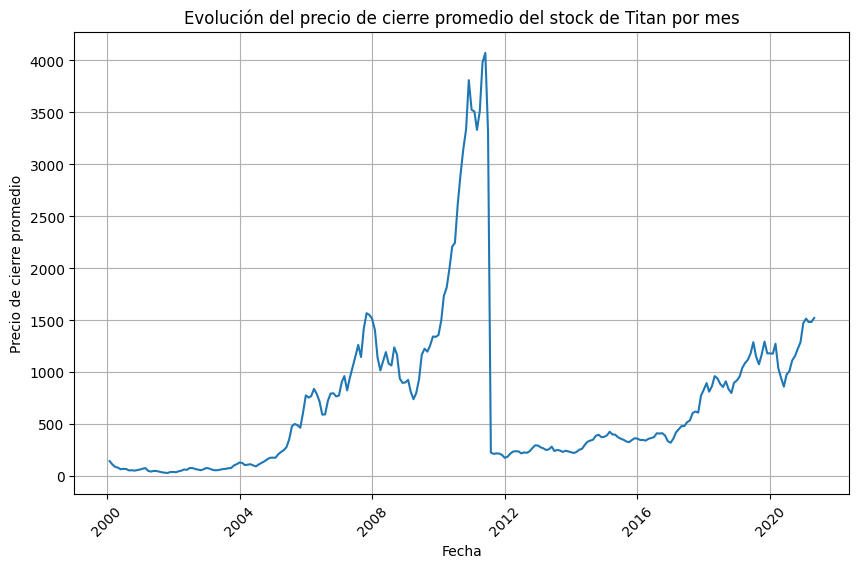

In [21]:
# Visualización univariada del precio de cierre promedio
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Close'])
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre promedio')
plt.title('Evolución del precio de cierre promedio del stock de Titan por mes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



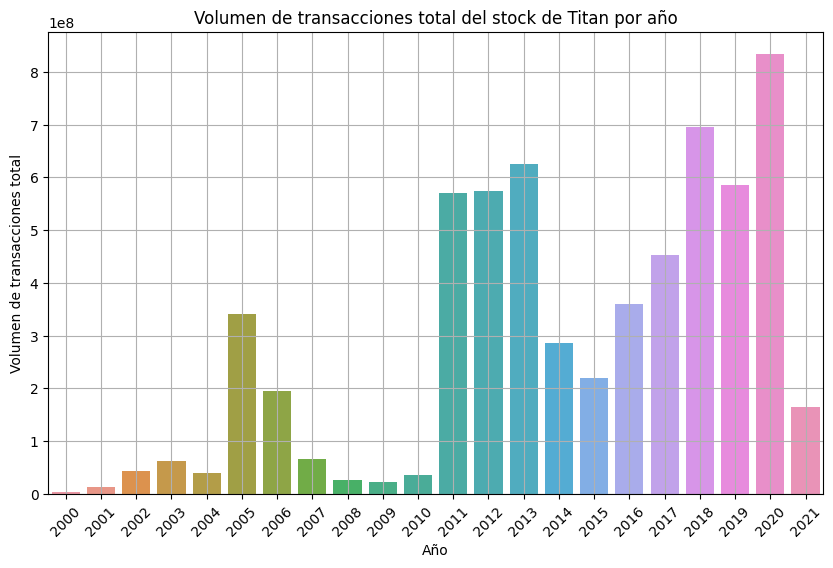

Resumen numérico del volumen de transacciones por año:
Media del volumen: 282808951.40909094
Desviación estándar del volumen: 264631336.9709565


In [26]:
# Resample de los datos por período anual y obtención del volumen total por año
df_annual = df['Volume'].resample('Y').sum()

# Visualización univariada del volumen de transacciones total por año
plt.figure(figsize=(10, 6))
sns.barplot(x=df_annual.index.year, y=df_annual)
plt.xlabel('Año')
plt.ylabel('Volumen de transacciones total')
plt.title('Volumen de transacciones total del stock de Titan por año')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Resumen numérico del volumen de transacciones por año
mean_volume_annual = df_annual.mean()
std_volume_annual = df_annual.std()
print(f"Resumen numérico del volumen de transacciones por año:")
print(f"Media del volumen: {mean_volume_annual}")
print(f"Desviación estándar del volumen: {std_volume_annual}")



In [23]:
# Resumen numérico del volumen de transacciones por mes
mean_volume_monthly = df_monthly['Volume'].mean()
std_volume_monthly = df_monthly['Volume'].std()
print(f"Resumen numérico del volumen de transacciones por mes:")
print(f"Media del volumen: {mean_volume_monthly}")
print(f"Desviación estándar del volumen: {std_volume_monthly}")



Resumen numérico del volumen de transacciones por mes:
Media del volumen: 24303894.26171875
Desviación estándar del volumen: 25754900.601611685


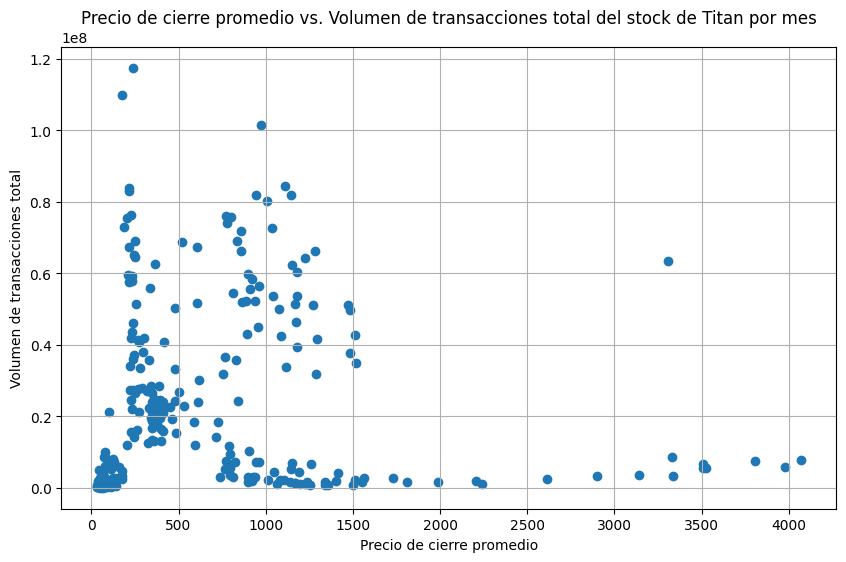

In [24]:
# Visualización bivariada: Precio de cierre promedio vs. Volumen de transacciones total por mes
plt.figure(figsize=(10, 6))
plt.scatter(df_monthly['Close'], df_monthly['Volume'])
plt.xlabel('Precio de cierre promedio')
plt.ylabel('Volumen de transacciones total')
plt.title('Precio de cierre promedio vs. Volumen de transacciones total del stock de Titan por mes')
plt.grid(True)
plt.show()



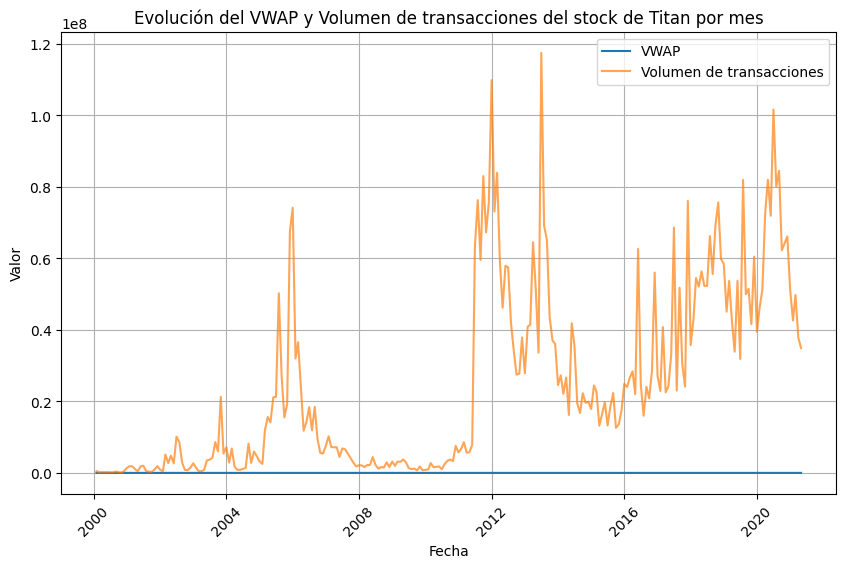

In [25]:
# Visualización multivariada: VWAP y Volumen de transacciones a lo largo del tiempo por mes
df_monthly['VWAP'] = df['VWAP'].resample('M').mean()

plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['VWAP'], label='VWAP')
plt.plot(df_monthly.index, df_monthly['Volume'], label='Volumen de transacciones', alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Evolución del VWAP y Volumen de transacciones del stock de Titan por mes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Resultados
**Hipótesis 1: El precio de cierre del stock de Titan ha experimentado una tendencia general al alza a lo largo de los años.**

Esta hipótesis parece ser parcialmente cierta hasta cerca del año 2012, ya que, en el primer gráfico, el precio de cierre muestra una tendencia alcista en general. Sin embargo, después de 2012, el precio experimenta una caída drástica, lo que contradice la tendencia alcista esperada.

**Hipótesis 2: El volumen de transacciones del stock de Titan ha experimentado variaciones a lo largo del tiempo, mostrando picos durante eventos o anuncios relevantes.**

Esta hipótesis parece ser plausible, ya que en el segundo gráfico, podemos observar que el volumen de transacciones es relativamente bajo hasta el año 2011, pero a partir de ese momento, experimenta un aumento significativo, alcanzando un pico en el año 2020. Esta variación en el volumen podría estar relacionada con eventos o anuncios relevantes que atrajeron la atención de los inversores.

**Hipótesis 3: Existe una correlación positiva entre el precio de cierre y el volumen de transacciones del stock de Titan.**

Esta hipótesis es menos respaldada por la información proporcionada en las visualizaciones. Aunque existe un aumento en el volumen de transacciones en ciertos momentos (como se observa en el segundo y el último gráfico), esta variación no parece estar fuertemente correlacionada con el precio de cierre. Además, en el último gráfico, el VWAP se muestra constante en cero, lo que podría indicar datos faltantes o un comportamiento inusual de esta variable.

**Conclusión:**

Dada la información disponible, la Hipótesis 2 parece ser la más acertada. El incremento en el volumen de transacciones a partir del año 2011 y los picos observados podrían estar relacionados con eventos importantes o noticias relevantes para la empresa Titan, lo que generó un mayor interés y participación de los inversores en el mercado.